In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("adult.csv")
data


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
print(data.isna().sum()) 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
data.replace('?', np.nan, inplace=True)

In [7]:
def fill_unknown(column):
    most_common = column.mode()[0]
    return column.fillna(most_common)

data["workclass"] = fill_unknown(data["workclass"])
data["occupation"] = fill_unknown(data["occupation"])
data["native.country"] = fill_unknown(data["native.country"])

In [8]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Eğitim Unvanlarının Dağılımı:

Eğitim unvanları, gelir grubunun geniş bir yelpazede yer aldığını gösterir. Örneğin, >50K gelir grubunda hem düşük eğitim seviyesine sahip bireyler hem de yüksek eğitim seviyesine sahip bireyler bulunmakta. Bu durum, eğitim yılının ve unvanlarının gelir üzerindeki etkisinin karmaşık olabileceğini ve diğer faktörlerin de etkili olabileceğini gösterir.

In [9]:
# Eğitim unvanlarını ve eğitim yılı aralığını kontrol etme
print(data['education'].unique())
print(data['education.num'].describe())


['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


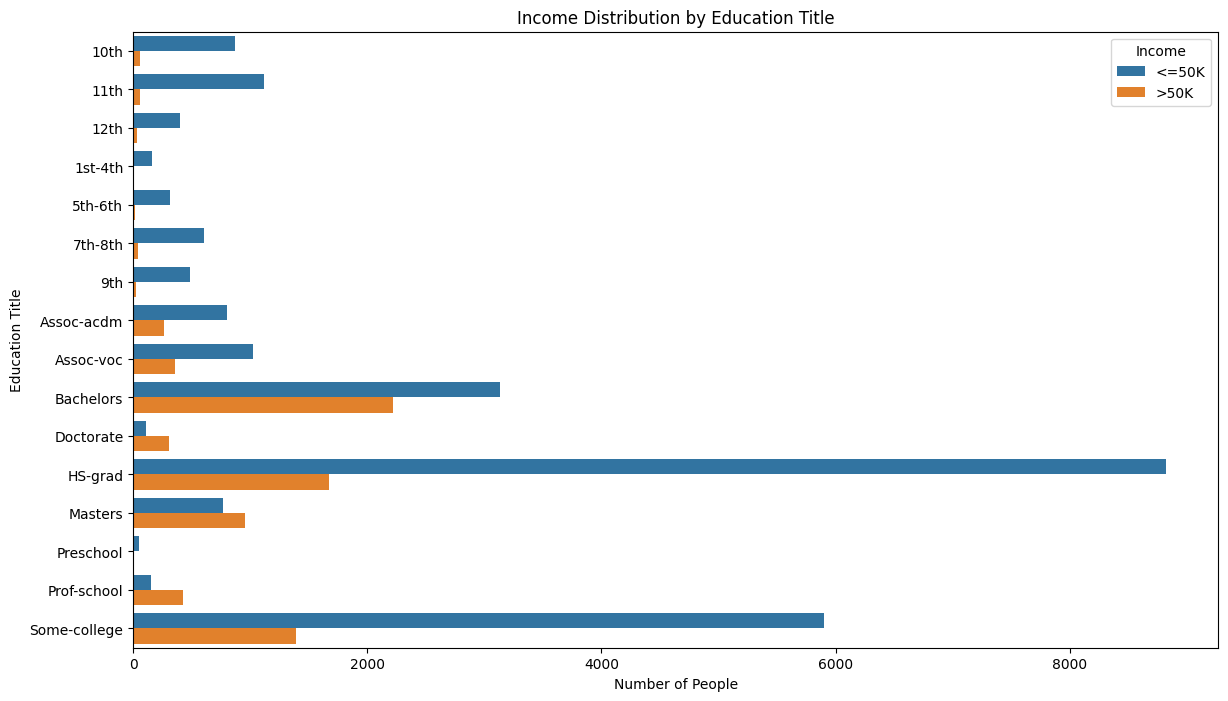

In [10]:
import seaborn as sns
# Eğitim unvanlarının gelir grubuna göre sayısı
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='education', hue='income', order=sorted(data['education'].unique()))
plt.title('Income Distribution by Education Title')
plt.xlabel('Number of People')
plt.ylabel('Education Title')
plt.legend(title='Income')
plt.show()


In [11]:
# Cinsiyet kolonunu sayısal hale getir
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Gelir kolonunu ikili hale getir
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)


This code categorizes countries in the native.country column by income level (Low, Medium, High) and converts these categories into ordinal numerical values (0, 1, 2). Missing country values are filled with the most frequent country, and the original column is replaced with the encoded version (native.country_encoded).

In [12]:


country_income_dict = {
    'United-States': 'High',
    'India': 'Low',
    'China': 'Medium',
    'Brazil': 'Medium',
    'Germany': 'High',
    'France': 'High',
    'Mexico': 'Medium',
    'Canada': 'High',
    'United-Kingdom': 'High',
    'Japan': 'High',
    'South-Africa': 'Low',
    'Australia': 'High',
    # Diğer ülkeler ve gelir seviyeleri eklenebilir
}

# Ülke adlarındaki boşlukları düzeltin
data['native.country'] = data['native.country'].str.replace(' ', '-')  # Ülke adlarındaki boşlukları düzeltin

# 'native.country' kolonundaki NaN değerlerini dolduralım
# En sık görülen değeri bulalım
most_frequent_native_country = data['native.country'].mode()[0]
data['native.country'] = data['native.country'].fillna(most_frequent_native_country)

# Ülke gelir seviyelerini sayısal değerlere dönüştürmek için bir mapping oluşturalım
country_mapping = {
    'United-States': 2,
    'India': 0,
    'China': 1,
    'Brazil': 1,
    'Germany': 2,
    'France': 2,
    'Mexico': 1,
    'Canada': 2,
    'United-Kingdom': 2,
    'Japan': 2,
    'South-Africa': 0,
    'Australia': 2
    # Diğer ülkeler ve değerler eklenebilir
}

# 'native.country' kolonunu sayısal değerlere dönüştürelim
data['native.country_encoded'] = data['native.country'].map(country_mapping).fillna(-1)  # -1 bilinmeyenleri temsil eder

# Eski 'native.country' kolonunu kaldırıp yeni encoded kolonu ekleyelim
data.drop(['native.country'], axis=1, inplace=True)

# Sonuçları inceleyelim
print(data.head())
print(data.info())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  sex  capital.gain  capital.loss  \
0     Prof-specialty  Not-in-family  White    0             0          4356   
1    Exec-managerial  Not-in-family  White    0             0          4356   
2     Prof-specialty      Unmarried  Black    0             0          4356   
3  Machine-op-inspct      Unmarried  White    0             0          3900   
4     Prof-specialty      Own-child  White    0             0          3900   

   hours.per.week  income  native.country_encoded  
0              40       0               

In [13]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,native.country_encoded
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,0,2.0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,0,2.0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,0,2.0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,0,2.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,0,2.0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,0,2.0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,1,2.0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,0,2.0


In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding uygulanacak kolonlar
columns_to_encode = ['workclass', 'marital.status', 'relationship', 'race','education']

# OneHotEncoder'ı doğrudan kullanarak veri setini dönüştürme
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(data[columns_to_encode])

# Encode edilmiş kolon isimlerini alalım
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Yeni DataFrame oluşturmak için, encode edilmiş kolonları ve diğer kolonları birleştirelim
data_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)

# Orijinal veri setinden encode edilen kolonları çıkaralım
data = data.drop(columns=columns_to_encode)

# Encode edilmiş kolonları orijinal veri setine ekleyelim
data = pd.concat([data, data_encoded], axis=1)

# İlk birkaç satırı görüntüleyelim
print(data.head())



   age  fnlwgt  education.num         occupation  sex  capital.gain  \
0   90   77053              9     Prof-specialty    0             0   
1   82  132870              9    Exec-managerial    0             0   
2   66  186061             10     Prof-specialty    0             0   
3   54  140359              4  Machine-op-inspct    0             0   
4   41  264663             10     Prof-specialty    0             0   

   capital.loss  hours.per.week  income  native.country_encoded  ...  \
0          4356              40       0                     2.0  ...   
1          4356              18       0                     2.0  ...   
2          4356              40       0                     2.0  ...   
3          3900              40       0                     2.0  ...   
4          3900              40       0                     2.0  ...   

   education_9th  education_Assoc-acdm  education_Assoc-voc  \
0            0.0                   0.0                  0.0   
1            0

This code categorizes occupations by impact level (Low_Impact, Medium_Impact, High_Impact) and converts these categories into ordinal numerical values (0, 1, 2). Missing values are filled with the most frequent occupation, and the original column is replaced with the encoded version.

In [15]:

# Meslekleri kategorize etme fonksiyonu
def categorize_occupation(occupation):
    if isinstance(occupation, str):  # Sadece string türündeki verilerle işlem yapar
        occupation = occupation.lower()  # Tüm metni küçük harfe çevirme
        if occupation in ['exec-managerial', 'prof-specialty']:
            return 'High_Impact'
        elif occupation in ['protective-serv', 'tech-support', 'sales', 'craft-repair']:
            return 'Medium_Impact'
        else:
            return 'Low_Impact'

# Meslekleri kategorize etme
data['occupation'] = data['occupation'].apply(categorize_occupation)

# NaN değerlerini mod ile doldurma
mode_value = data['occupation'].mode()[0]  # En sık görülen değeri al
data['occupation'].fillna(mode_value, inplace=True)

# Sıralı derecelendirme yapmak için bir mapping oluşturma
occupation_mapping = {
    'Low_Impact': 0,
    'Medium_Impact': 1,
    'High_Impact': 2,
}


data['occupation_encoded'] = data['occupation'].map(occupation_mapping)


data.drop(['occupation'], axis=1, inplace=True)


print("Unique values in 'occupation' column:", data['occupation_encoded'].unique())
print("Frequency of each category:")
print(data['occupation_encoded'].value_counts())

# Sonuçları inceleyelim
print(data.head())
print(data.info())


Unique values in 'occupation' column: [2 0 1]
Frequency of each category:
occupation_encoded
0    13186
2    10049
1     9326
Name: count, dtype: int64
   age  fnlwgt  education.num  sex  capital.gain  capital.loss  \
0   90   77053              9    0             0          4356   
1   82  132870              9    0             0          4356   
2   66  186061             10    0             0          4356   
3   54  140359              4    0             0          3900   
4   41  264663             10    0             0          3900   

   hours.per.week  income  native.country_encoded  workclass_Local-gov  ...  \
0              40       0                     2.0                  0.0  ...   
1              18       0                     2.0                  0.0  ...   
2              40       0                     2.0                  0.0  ...   
3              40       0                     2.0                  0.0  ...   
4              40       0                     2.0       

C:\Users\simge\AppData\Local\Temp\ipykernel_10908\3795252379.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].fillna(mode_value, inplace=True)


In [16]:
data

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,native.country_encoded,workclass_Local-gov,...,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,occupation_encoded
0,90,77053,9,0,0,4356,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,82,132870,9,0,0,4356,18,0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,66,186061,10,0,0,4356,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,54,140359,4,0,0,3900,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,41,264663,10,0,0,3900,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
32557,27,257302,12,0,0,0,38,0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
32558,40,154374,9,1,0,0,40,1,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
32559,58,151910,9,0,0,0,40,0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [17]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from scipy import stats

# Aykırı değerleri kontrol etmek istediğiniz sütunları seçin
outliers_columns = ["age", "hours.per.week"]
outliers_data = data[outliers_columns]

# Z-scoreları hesaplama
z_scores = stats.zscore(outliers_data)

# Aykırı değerleri belirle (örneğin, 3 standart sapma için bir eşik kullanarak)
outliers = (z_scores > 3) | (z_scores < -3)

# Orijinal veri setindeki aykırı değerleri çıkar
data_cleaned = data[~outliers.any(axis=1)]



In [19]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test olarak ayırma
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


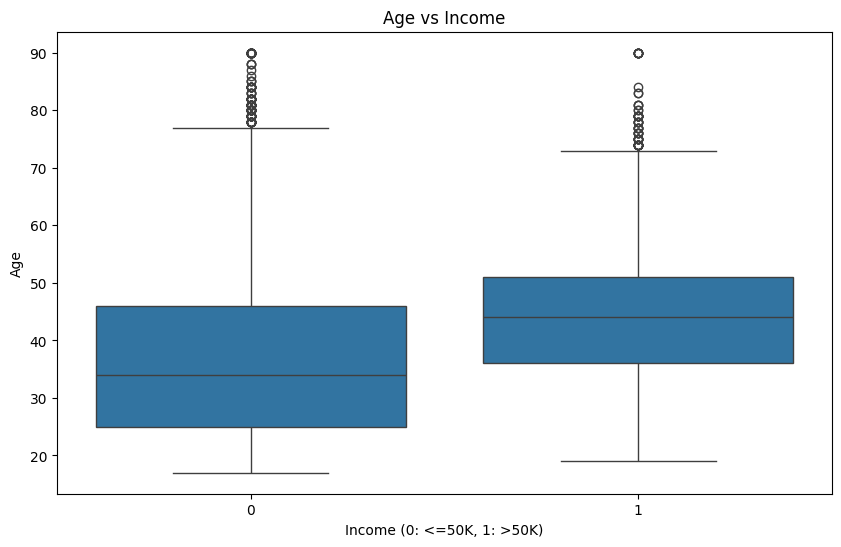

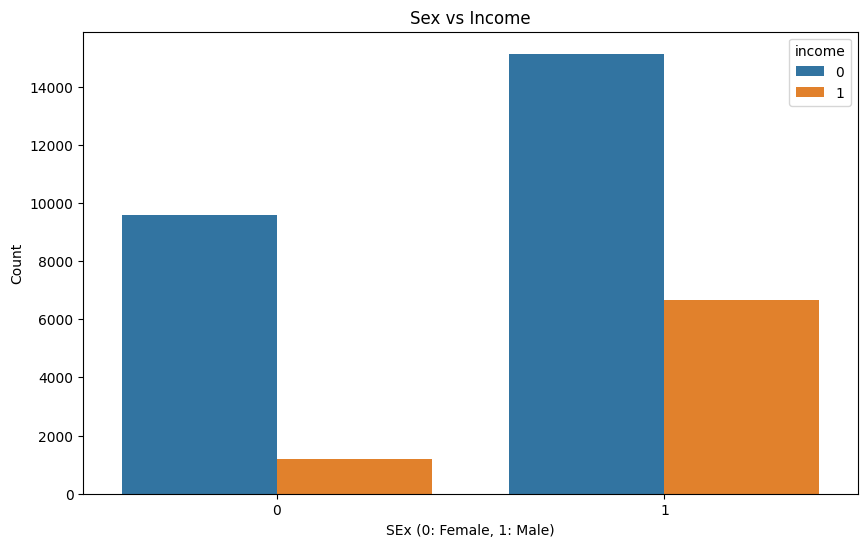

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Yaş ve Gelir Arasındaki İlişki
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age vs Income')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Age')
plt.show()

# Cinsiyet ve Gelir Arasındaki İlişki
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=data)
plt.title('Sex vs Income')
plt.xlabel('SEx (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

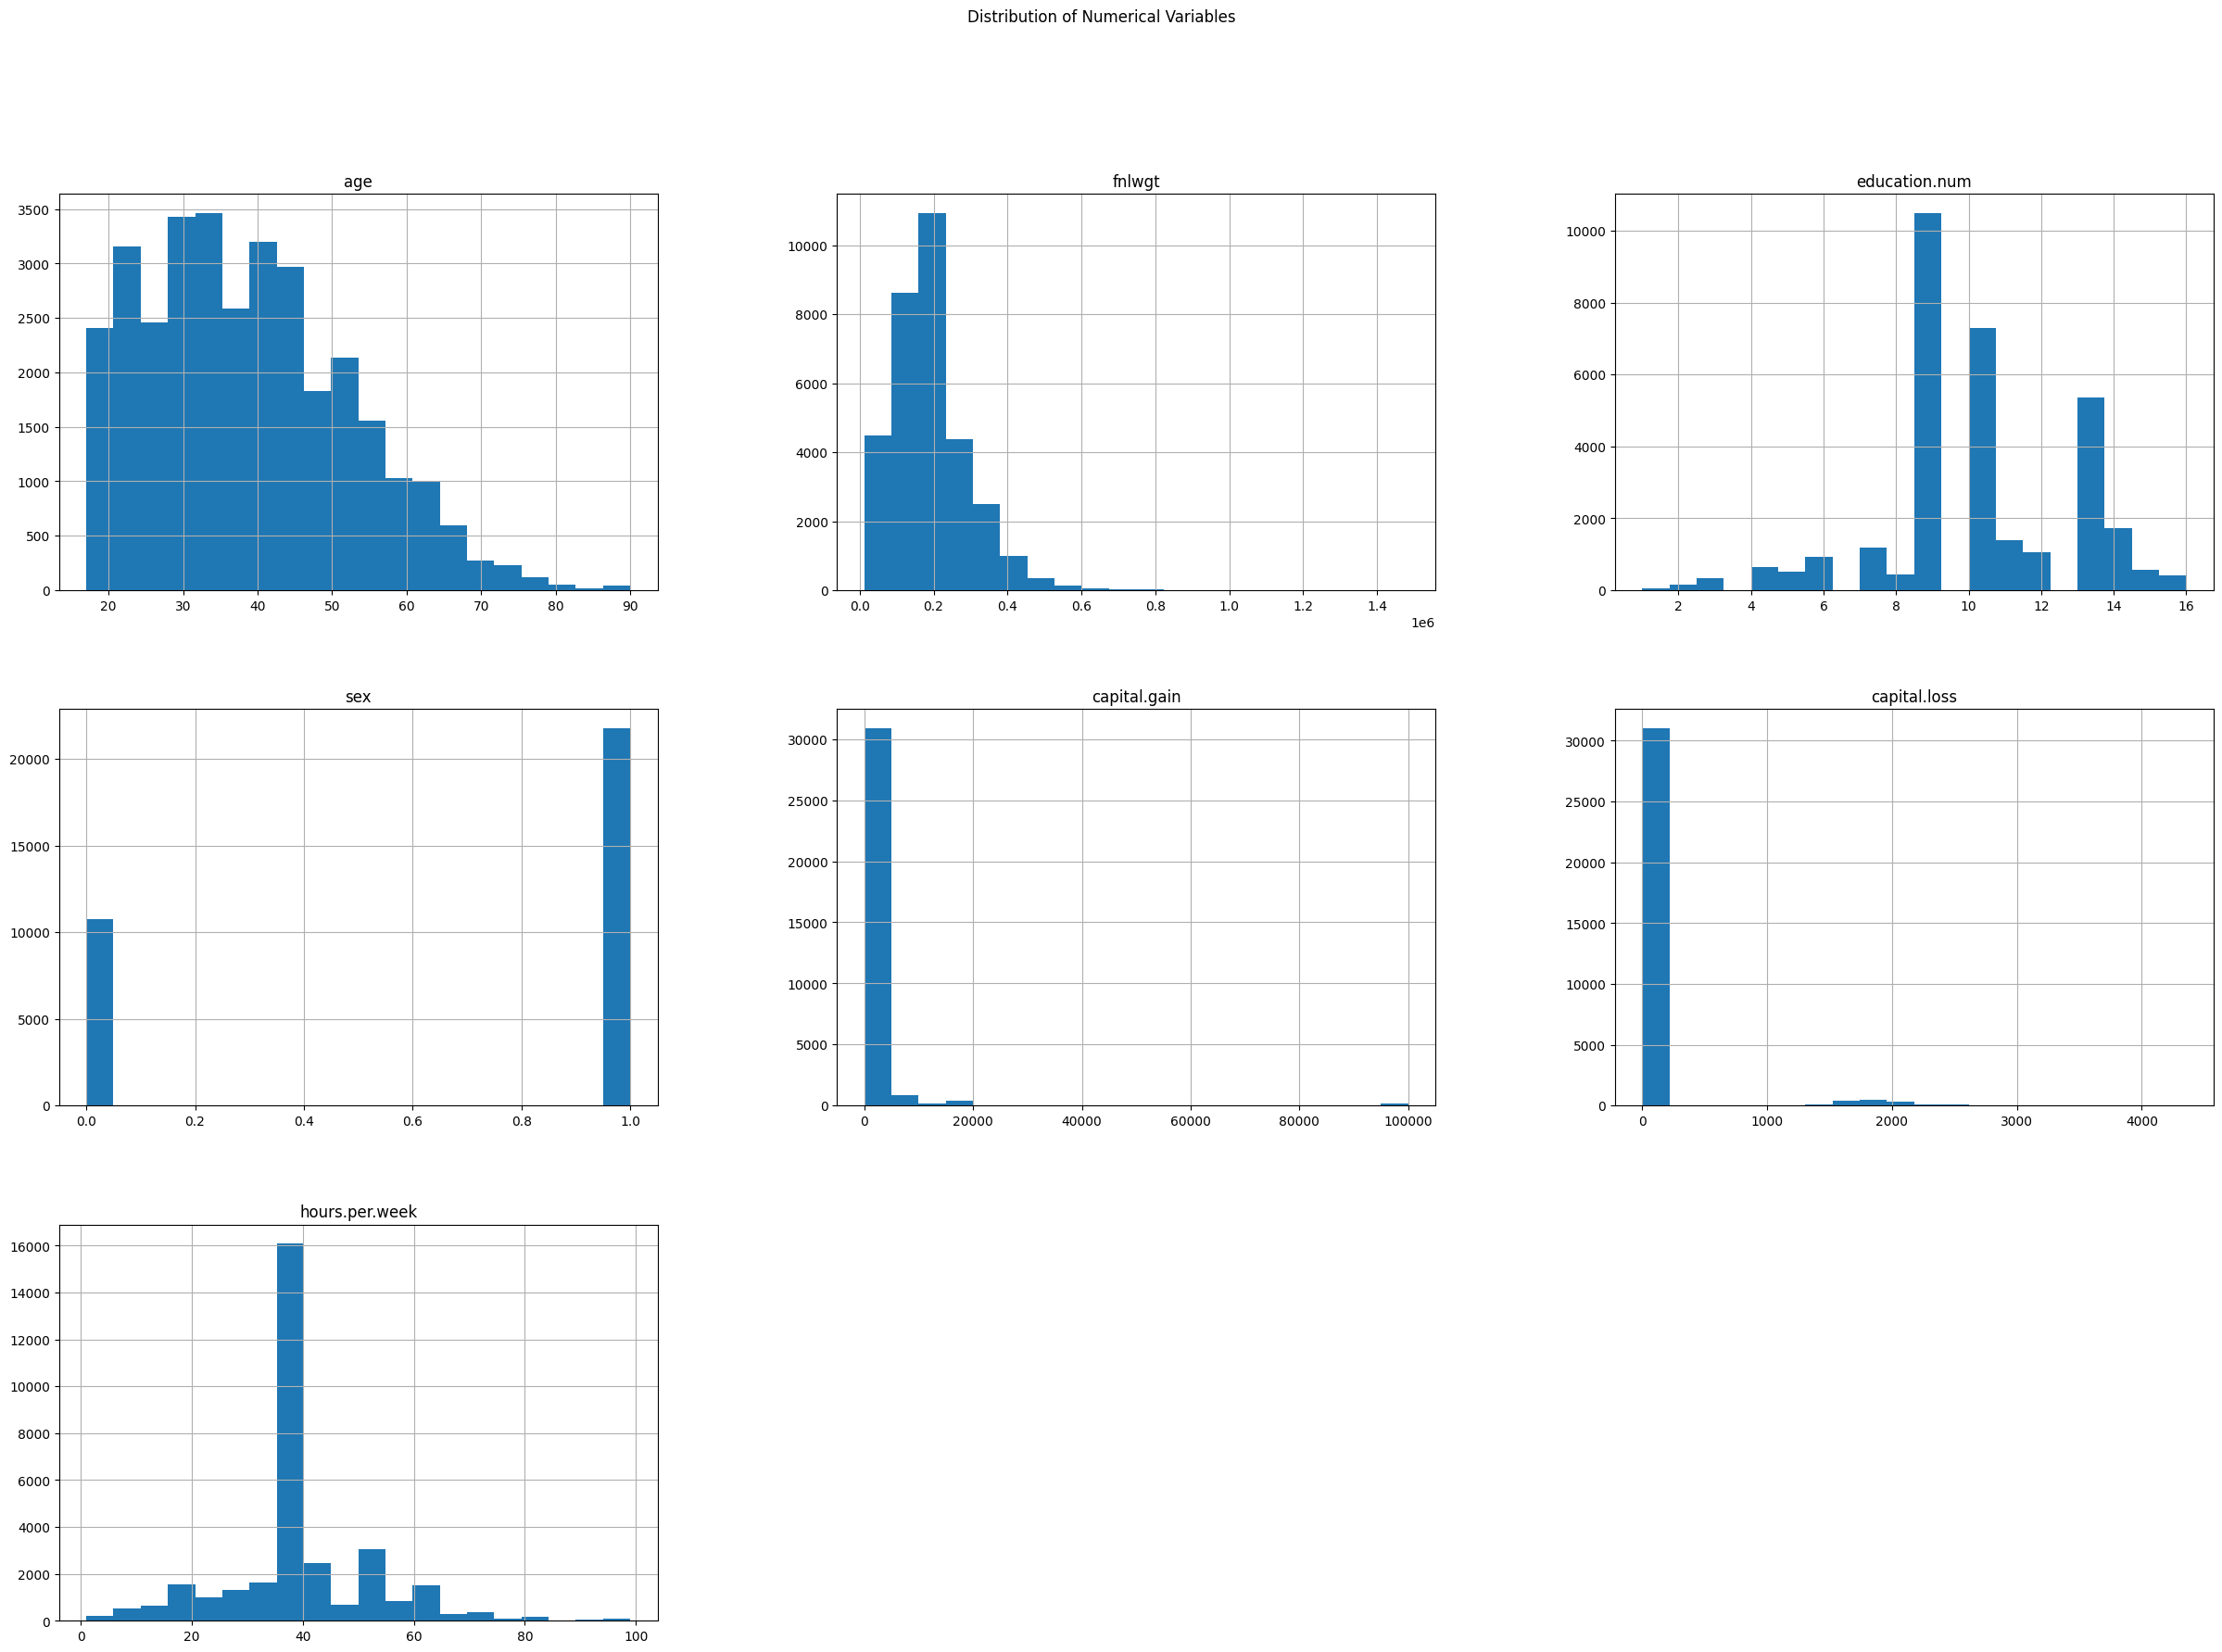

In [21]:
import seaborn as sns
data.describe()

# Sayısal değişkenlerin histogramları
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[:7]

data[numerical_columns].hist(figsize=(30, 20), bins=20)
plt.suptitle('Distribution of Numerical Variables')
plt.show()



In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Modeli oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Modeli eğitme
mlp_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_mlp = mlp_model.predict(X_test)

# Sonuçları değerlendirme
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7429
           1       0.60      0.34      0.43      2340

    accuracy                           0.79      9769
   macro avg       0.71      0.63      0.65      9769
weighted avg       0.76      0.79      0.76      9769



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Tahmin yapma ve sonuçları değerlendirme
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))




              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7429
           1       0.60      0.62      0.61      2340

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [24]:
from sklearn.svm import SVC

# SVM modelini oluşturma ve eğitme
svm = SVC()
svm.fit(X_train, y_train)

# Tahmin yapma ve sonuçları değerlendirme
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))




              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7429
           1       0.99      0.14      0.25      2340

    accuracy                           0.79      9769
   macro avg       0.89      0.57      0.56      9769
weighted avg       0.83      0.79      0.73      9769



In [26]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Modeli oluşturma
lgbm = lgb.LGBMClassifier()

# Modeli eğitme
lgbm.fit(X_train, y_train)

# Tahmin yapma
y_pred = lgbm.predict(X_test)

# Sonuçları değerlendirme
print(classification_report(y_test, y_pred))




[LightGBM] [Info] Number of positive: 5501, number of negative: 17291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 22792, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241357 -> initscore=-1.145256
[LightGBM] [Info] Start training from score -1.145256
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7429
           1       0.78      0.63      0.70      2340

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Modeli oluşturma
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_xgb = xgb_model.predict(X_test)

# Sonuçları değerlendirme
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


d:\Program Files\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:08:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7429
           1       0.77      0.64      0.70      2340

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



In [28]:
pip install catboost 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:

from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CatBoostClassifier için hiperparametre arama alanlarını belirleme
param_distributions = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'iterations': [100, 200], 
    'l2_leaf_reg': [1, 3]
}

# CatBoostClassifier modelini oluşturma
catboost = CatBoostClassifier(verbose=0)

# RandomizedSearchCV tanımlama
random_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_distributions,
    n_iter=10,  # Deneme sayısını azalttık
    scoring='accuracy',
    cv=5,  # Çapraz doğrulama kat sayısı
    verbose=2,
    random_state=42
)

# RandomizedSearchCV ile model eğitimi
random_search.fit(X_train, y_train)

# En iyi parametreler
print("Best Parameters:")
print(random_search.best_params_)

# En iyi model ile tahmin yapma
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Sonuçları değerlendirme
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.9s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.9s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.9s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.1s
[CV] END depth=4, iterations=200, l2_leaf_reg=1, learning_r

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Modeli oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Modeli eğitme
mlp_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_mlp = mlp_model.predict(X_test)

# Sonuçları değerlendirme
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7429
           1       0.60      0.34      0.43      2340

    accuracy                           0.79      9769
   macro avg       0.71      0.63      0.65      9769
weighted avg       0.76      0.79      0.76      9769



In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Modeli oluşturma
knn_model = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitme
knn_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_knn = knn_model.predict(X_test)

# Sonuçları değerlendirme
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7429
           1       0.55      0.30      0.39      2340

    accuracy                           0.77      9769
   macro avg       0.68      0.61      0.63      9769
weighted avg       0.75      0.77      0.75      9769



[LightGBM] [Info] Number of positive: 5501, number of negative: 17291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 22792, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241357 -> initscore=-1.145256
[LightGBM] [Info] Start training from score -1.145256


d:\Program Files\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:11:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\simge\AppData\Local\Temp\ipykernel_10908\3260620943.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores_df.index, y=f1_scores_df['F1-Score'], palette='viridis')


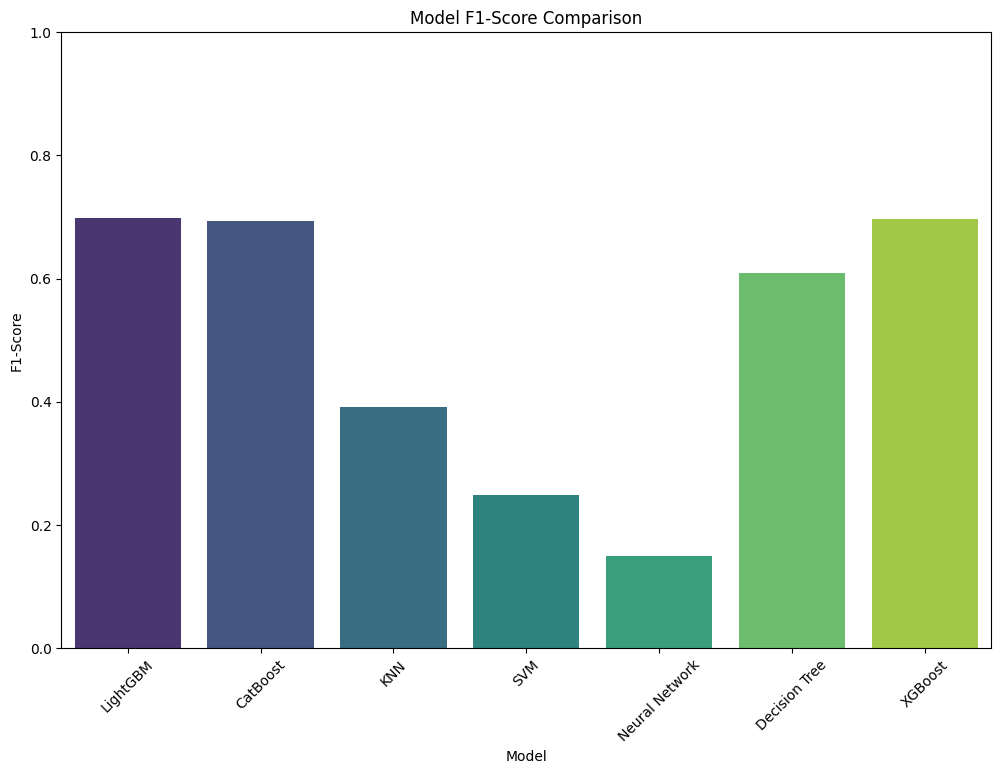

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Modelleri oluşturma
models = {
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(learning_rate=0.1, depth=6, iterations=200, verbose=0),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # XGBoost'u ekledik
}

# Model sonuçlarını saklamak için bir sözlük
results = {}

for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test)
    
    # Classification Report'tan F1-Score'u alma
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    
    # Sonuçları saklama
    results[name] = f1_score


f1_scores_df = pd.DataFrame.from_dict(results, orient='index', columns=['F1-Score'])

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x=f1_scores_df.index, y=f1_scores_df['F1-Score'], palette='viridis')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.show()





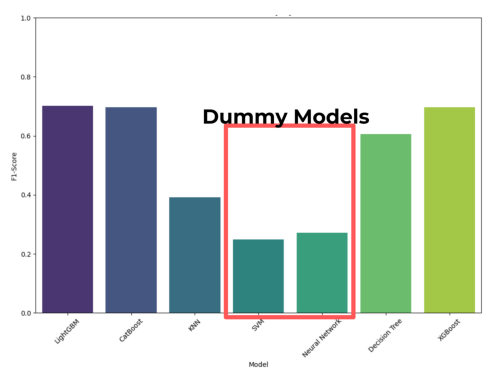

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image_for_py.png') 

plt.imshow(img)
plt.axis('off') 
plt.show()

Although SVM and Neural Network models are commonly used for classification problems, I anticipated that they would be less suitable for this dataset due to its characteristics (such as the high density of categorical data and the dataset size). Therefore, I used them as reference (or dummy) models for performance evaluation. This approach allowed me to more clearly observe the superiority of stronger algorithms like GBM models on this dataset.

GBM models (LightGBM, CatBoost, XGBoost) perform well on this dataset because they use tree-based algorithms that can effectively capture categorical and complex relationships. They automatically select the best features, handle missing data robustly, and use regularization techniques to prevent overfitting, which enhances their overall performance.

Decision Tree: As a simple model, it can learn some relationships but its performance is limited due to overfitting and lack of ensemble structure.

KNN: K-Nearest Neighbors can be effective for smaller datasets with well-defined clusters but may struggle with large datasets or those with high-dimensional categorical features. The model's performance can be influenced by the choice of the number of neighbors and the distance metric used.

Overall, both models offer moderate performance for the dataset at hand.